In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.preprocessing import StandardScaler,LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score

In [4]:
df = pd.read_csv('tips.csv')
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
#Make a list of categorical and numerical columns in the data.
cat = []
num = []
for i in df.columns:
    if df[i].dtypes=='object':
        cat.append(i)
    else:
        num.append(i)      
print('The categorical variables are:\n',cat,'\n')
print('The numerical variables are:\n',num)

The categorical variables are:
 ['sex', 'smoker', 'day', 'time'] 

The numerical variables are:
 ['total_bill', 'tip', 'size']


In [6]:
#Compute the average bill amount for each day.
df.groupby('day')['total_bill'].mean()

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64

In [8]:
#Which gender is more generous in giving tips?
df.groupby('sex')['tip'].mean()

sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64

In [9]:
#According to the data, were there more customers for dinner or lunch?
df.groupby('time')['size'].count()


time
Dinner    176
Lunch      68
Name: size, dtype: int64

In [10]:
#Based on the statistical summary, comment on the variable 'tip'
df['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

In [11]:
#Find the busiest day in terms of the orders?
df.day.mode()

0    Sat
Name: day, dtype: object

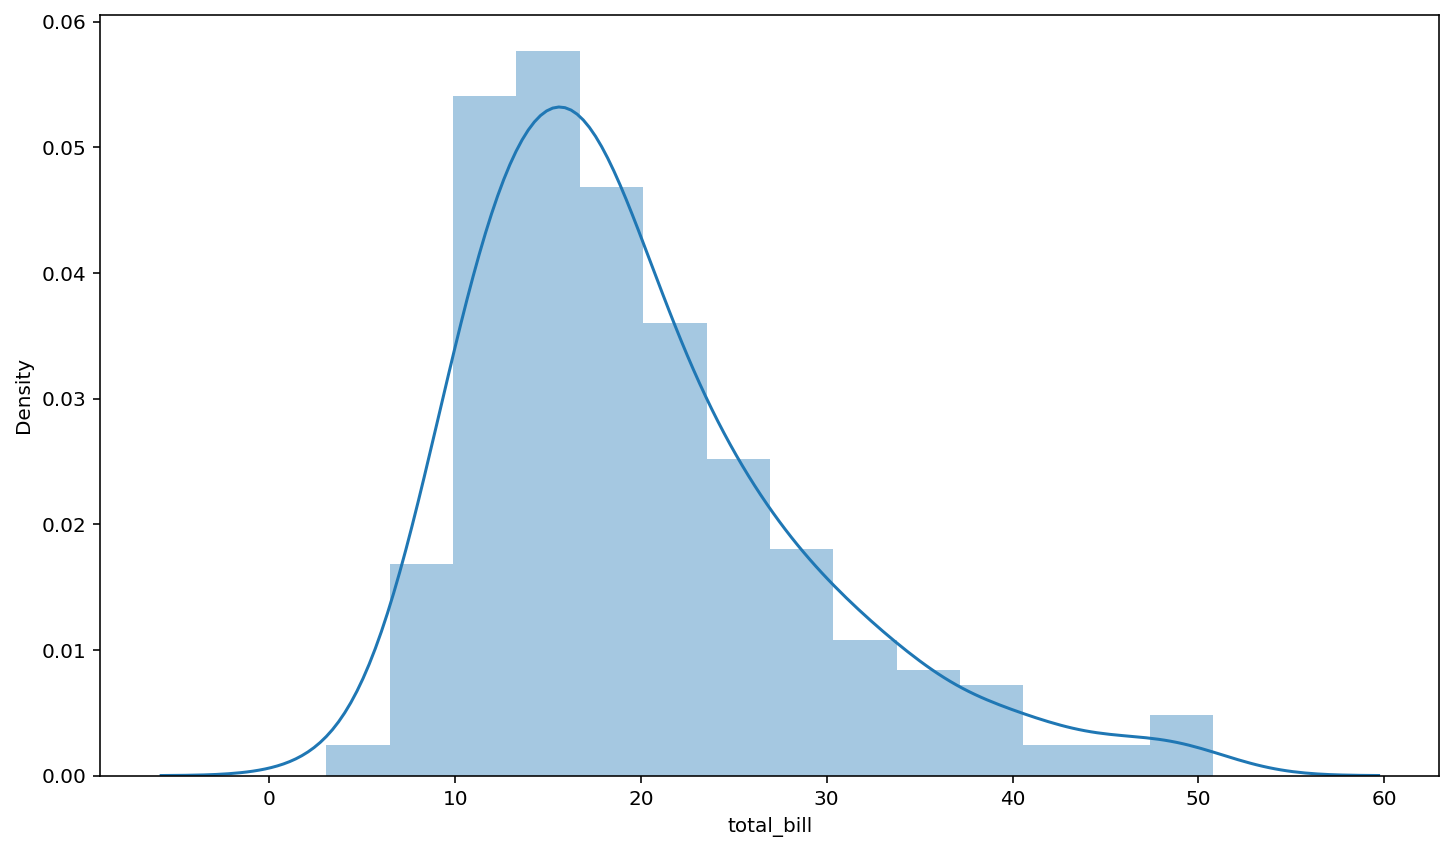

In [12]:
#Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot
sns.distplot(df['total_bill'])
plt.show()

In [13]:
df['total_bill'].skew()

1.1332130376158205

In [14]:
#Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate plot and metric and write your findings.
df[['tip','total_bill']].corr()

,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


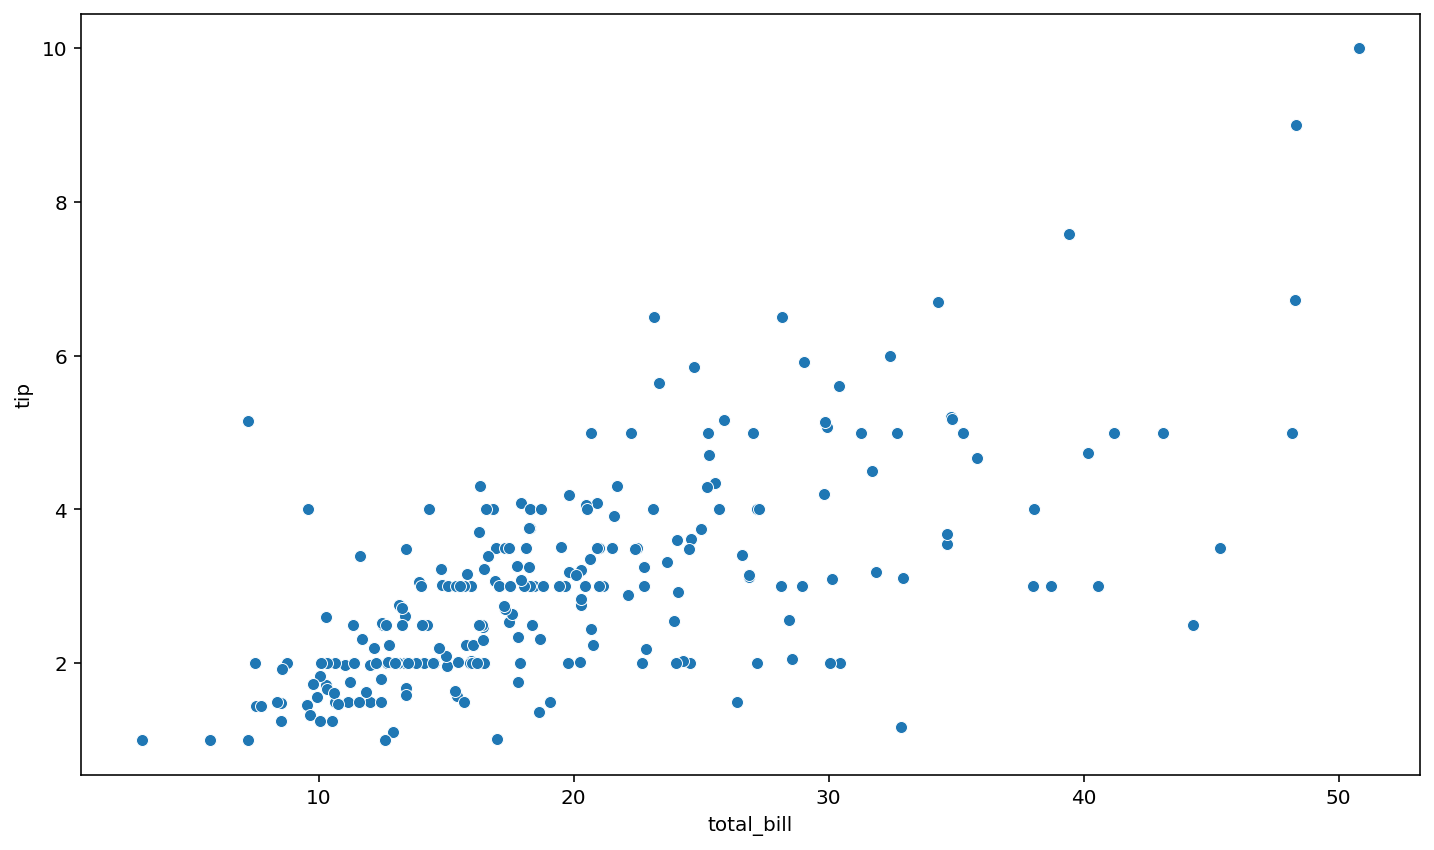

In [15]:
sns.scatterplot(x='total_bill',y='tip',data=df)
plt.show()

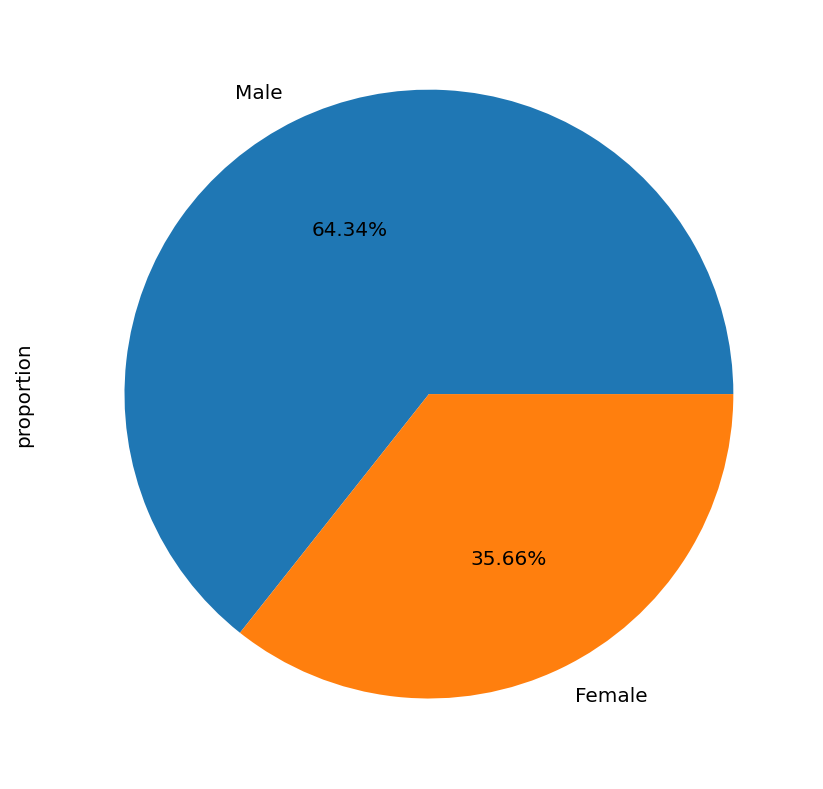

In [16]:
#What is the percentage of males and females in the dataset? and display it in the plot
df['sex'].value_counts(normalize=True).plot(kind='pie',autopct='%.2f%%')
plt.show()

In [17]:
#Compute the gender-wise count based on smoking habits and display it in the plot
df.groupby('sex')['smoker'].value_counts()

sex     smoker
Female  No        54
        Yes       33
Male    No        97
        Yes       60
Name: count, dtype: int64

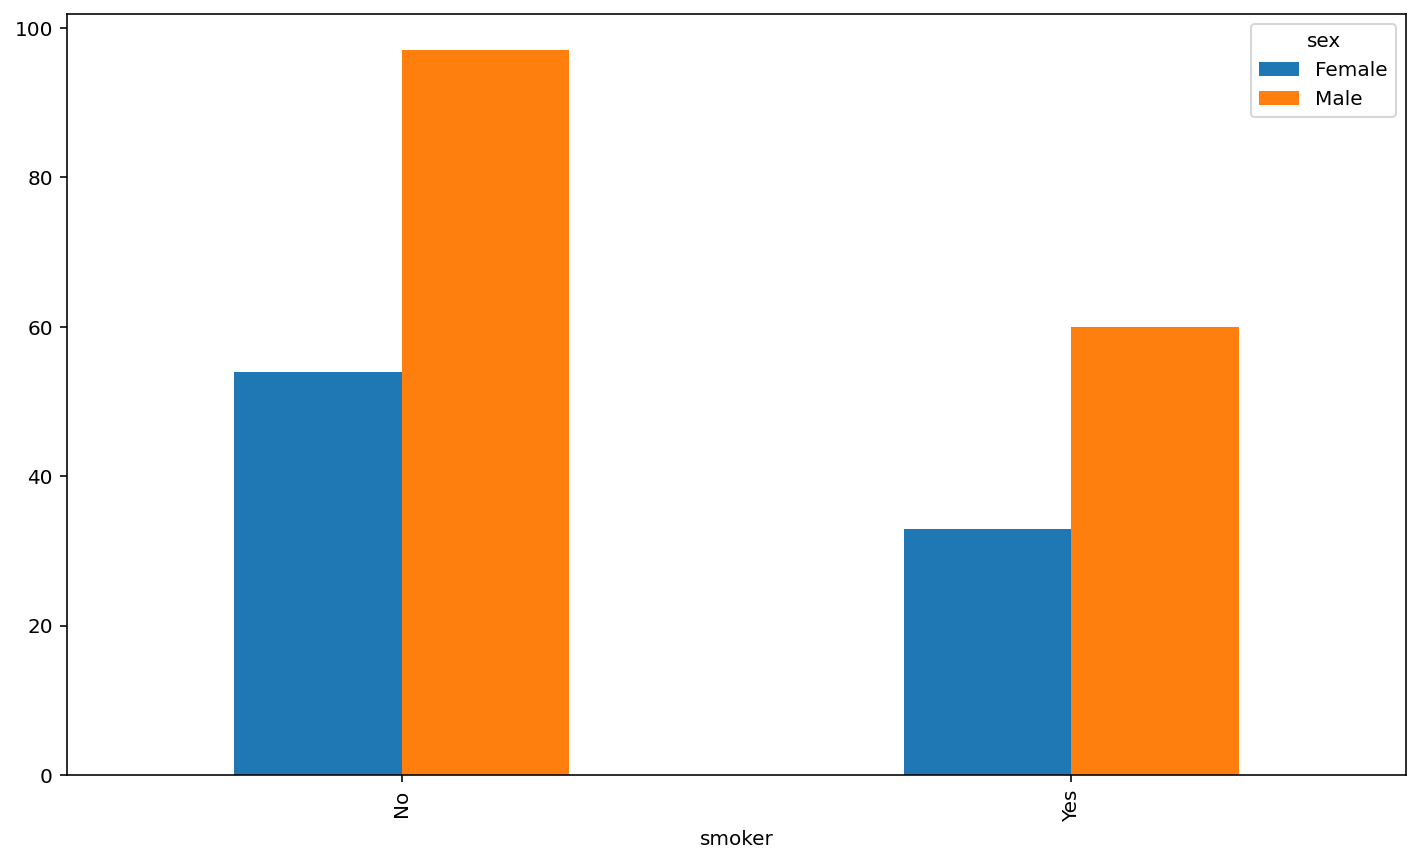

In [18]:
pd.crosstab(df['smoker'],df['sex']).plot(kind='bar')
plt.show()

In [19]:
#Compute the average tip amount given for different days and display it in the plot.
df.groupby('day')['tip'].mean()

day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64

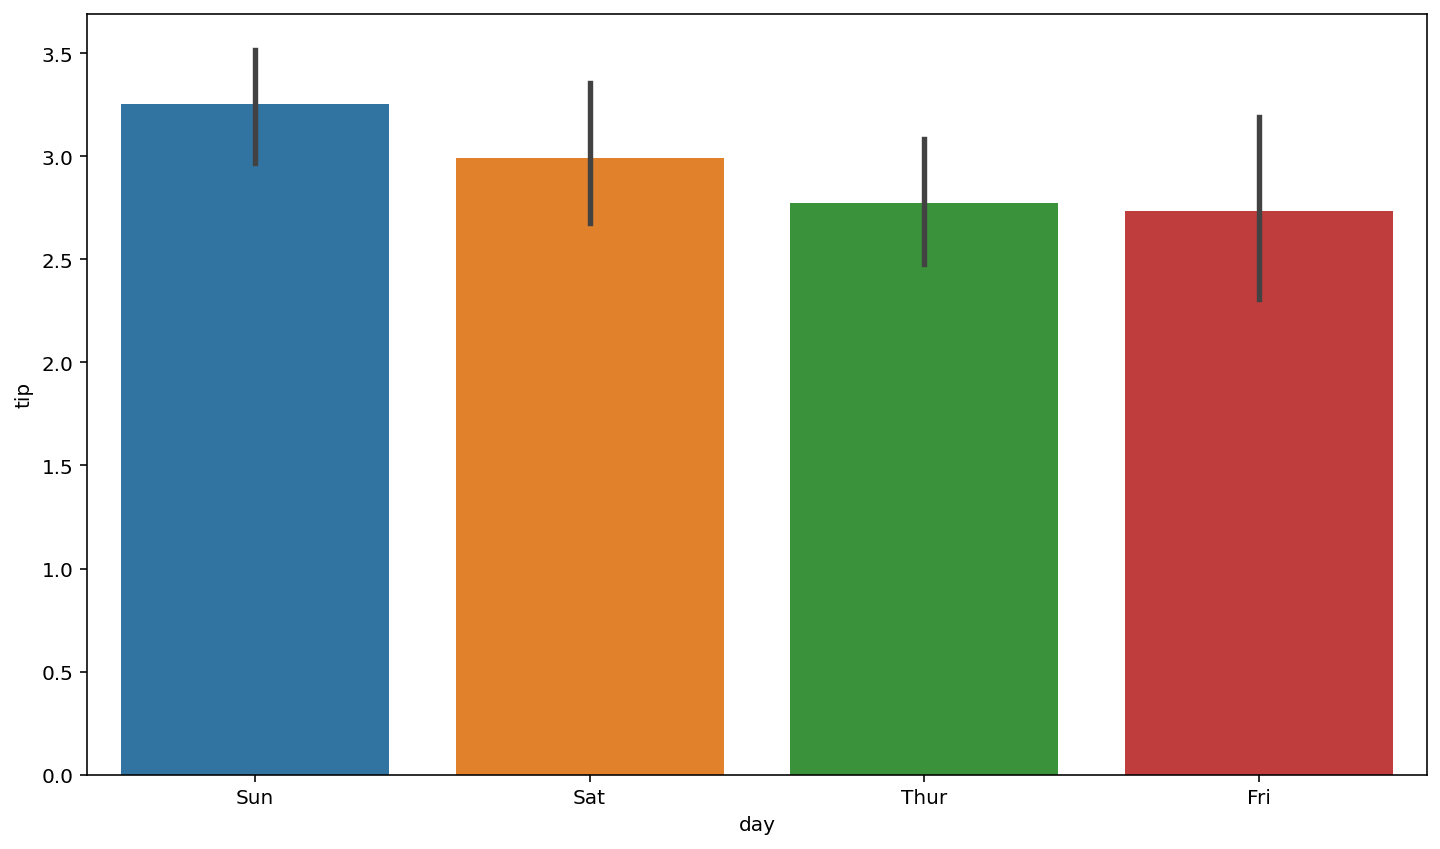

In [20]:
sns.barplot(x='day',y='tip',data=df)
plt.show()

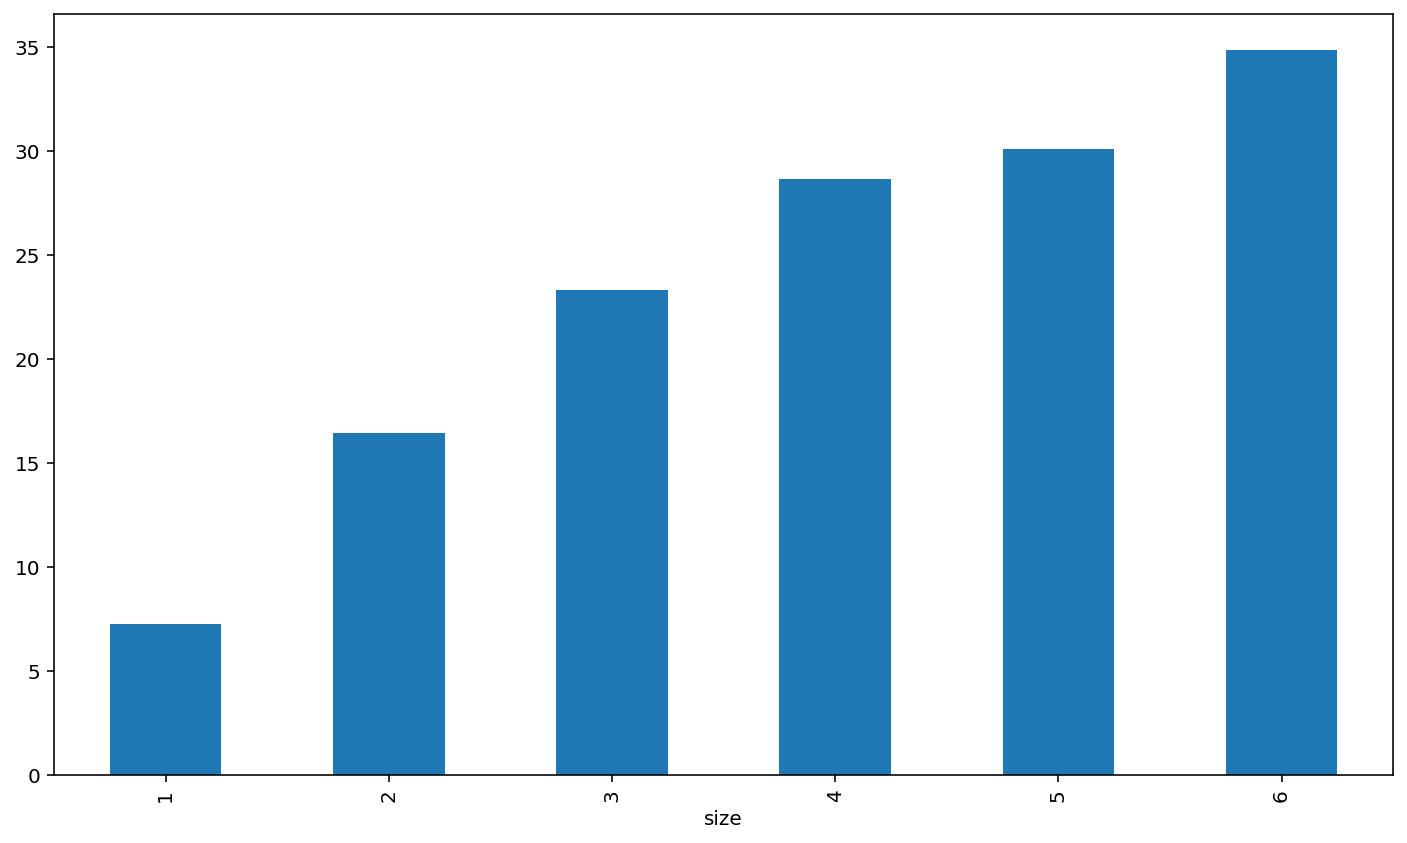

In [21]:
#Is the average bill amount dependent on the size of the group? Visualize the relationship using appropriate plot and write your findings.
df.groupby('size')['total_bill'].mean().plot(kind='bar')
plt.show()

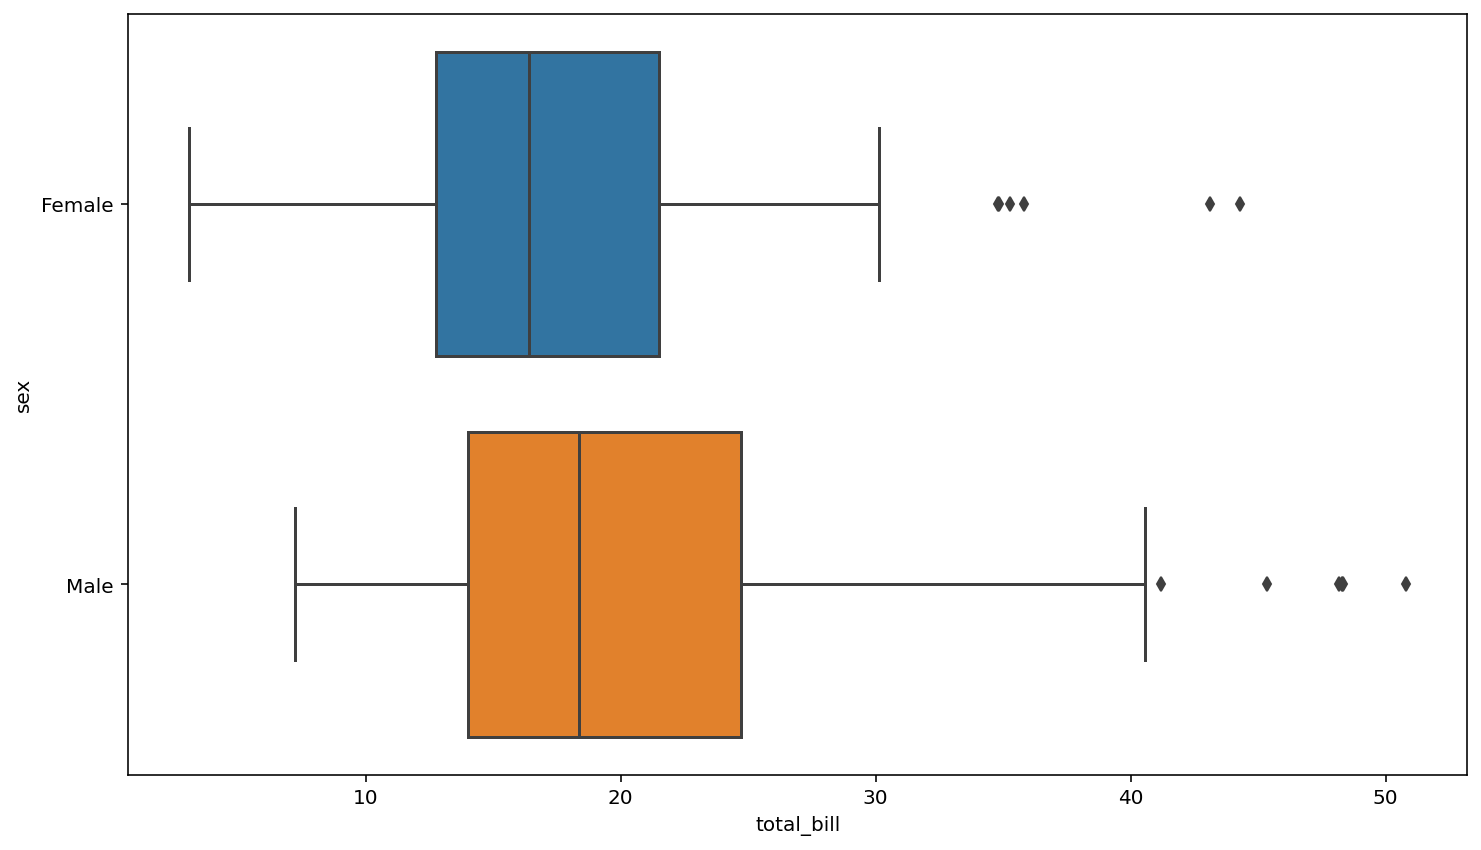

In [22]:
#Plot a horizontal boxplot to compare the bill amount based on gender
sns.boxplot(x='total_bill',y='sex',data=df)
plt.show()

In [23]:
#Find the maximum bill amount for lunch and dinner on Saturday and Sunday
df.groupby(['time','day'])['total_bill'].max()

time    day 
Dinner  Fri     40.17
        Sat     50.81
        Sun     48.17
        Thur    18.78
Lunch   Fri     16.27
        Thur    43.11
Name: total_bill, dtype: float64

In [24]:
#Compute the percentage of missing values in the dataset.
df.isnull().sum()/len(df)*100

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64

In [25]:
#Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them
len(df[df.duplicated()])

1

In [26]:
## dropping duplicates.
df.drop_duplicates(inplace=True)

In [27]:
## recheck
len(df[df.duplicated()])

0

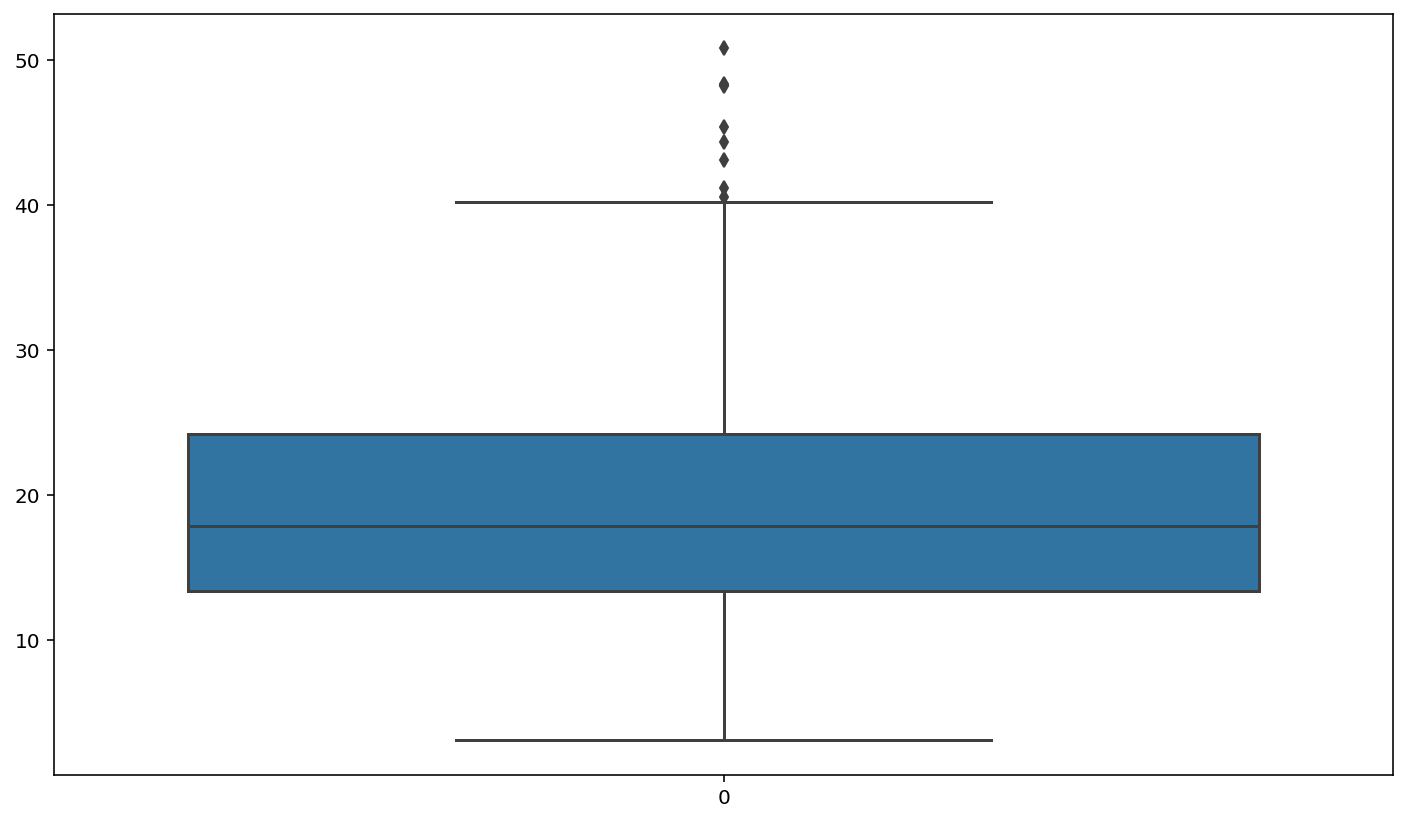

In [28]:
#Is there are any outliers present in the column 'total_bill'? If yes treat them with transformation approach, and plot a boxplot before and after the treatment
## boxplot before treatment
sns.boxplot(df['total_bill'])
plt.show()

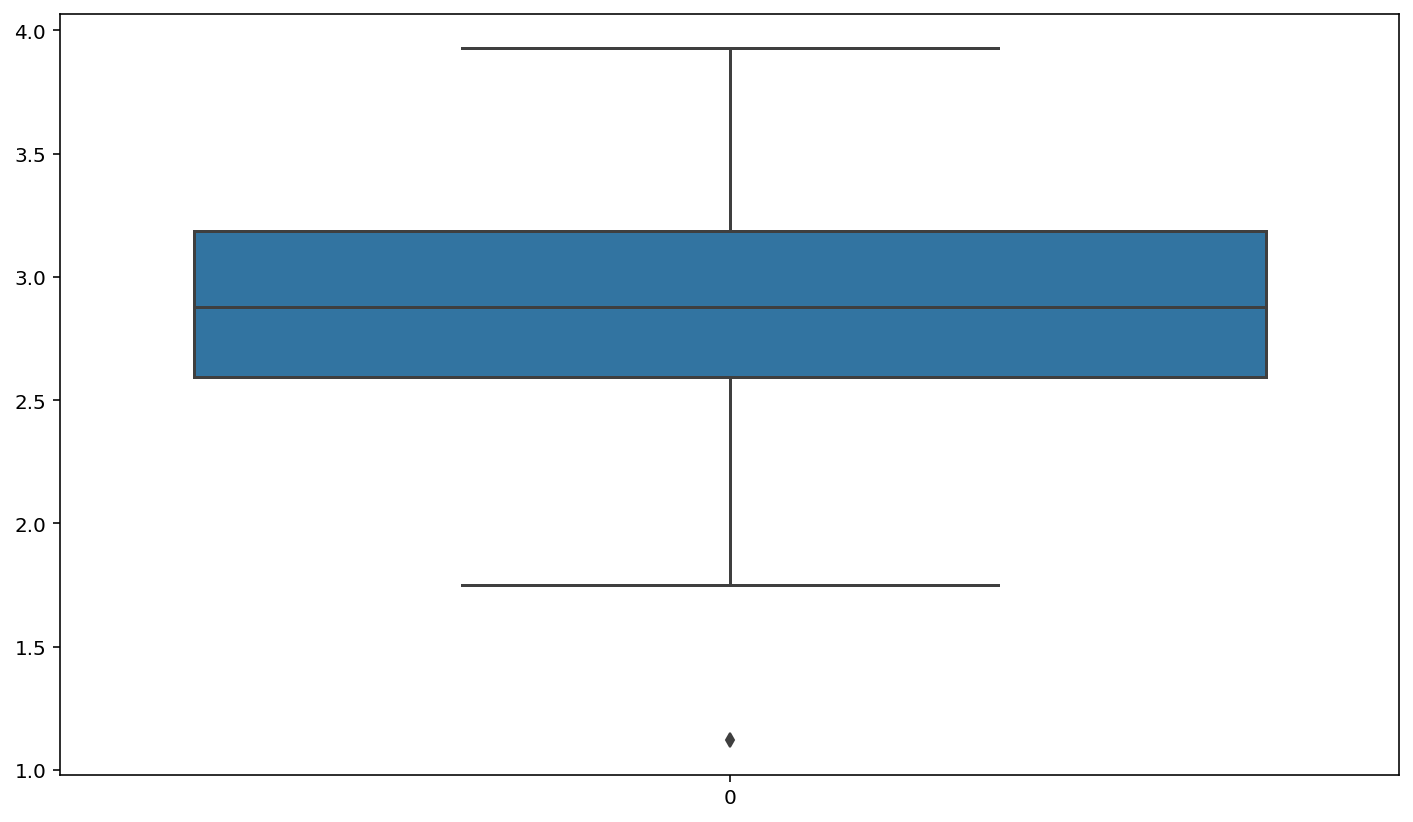

In [29]:
## treating outliers using log transformation
df['total_bill_trans'] = np.log(df['total_bill'])

## boxplot after transformation
sns.boxplot(df['total_bill_trans'])
plt.show()

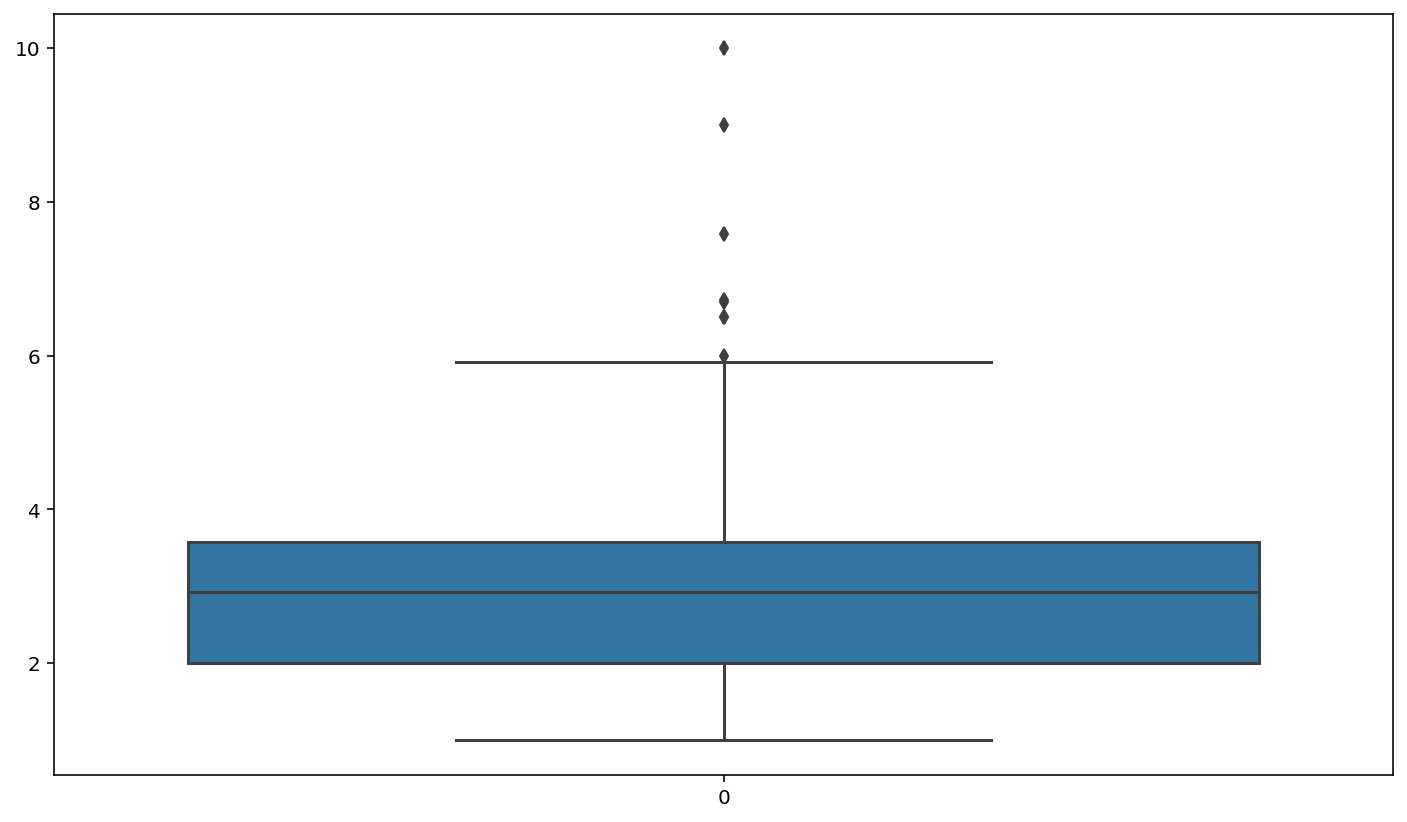

In [30]:
#Is there are any outliers present in the column 'tip'? If yes remove them using IQR techinque.
sns.boxplot(df['tip'])
plt.show()

In [31]:
# Using IQR method
Q1 = df['tip'].quantile(0.25)
Q3 = df['tip'].quantile(0.75)
IQR = Q3-Q1

lower_whisker  = Q1-(1.5*IQR)
upper_whisker  = Q3+(1.5*IQR)

In [32]:
df_out = df.loc[(df['tip'] < upper_whisker) & (df['tip'] > lower_whisker)] # rows without outliers

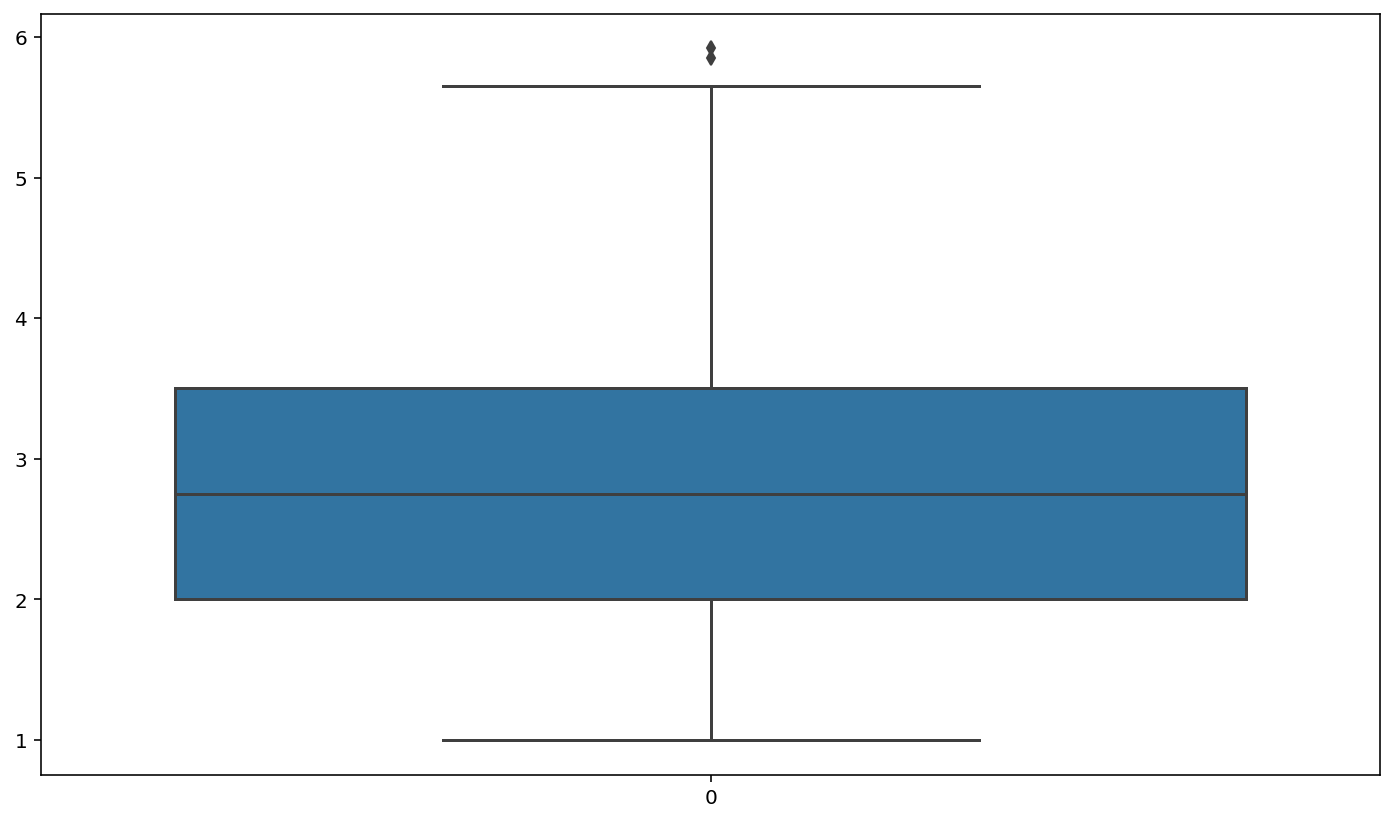

In [33]:
sns.boxplot(df_out['tip'])
plt.show()

In [34]:
#Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.
df = pd.get_dummies(df,drop_first=True)
df.sample(5)

,total_bill,tip,size,total_bill_trans,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
46,22.23,5.00,2,3.101443,True,False,False,True,False,False
66,16.45,2.47,2,2.800325,False,False,True,False,False,False
141,34.30,6.70,6,3.535145,True,False,False,False,True,True
67,3.07,1.00,1,1.121678,False,True,True,False,False,False
69,15.01,2.09,2,2.708717,True,True,True,False,False,False


In [35]:
#Check the range of the column 'total_bill' and transform the values such that the range will be 1.
tb_max = df['total_bill'].max()
tb_min = df['total_bill'].min()
range_ = tb_max-tb_min
print(range_)

47.74


In [36]:
## initialize minmaxscalar
mm = MinMaxScaler()

In [37]:
## Normalizing the values of the total_bill, so that the range will be 1.
df['total_bill_mm'] = mm.fit_transform(df[['total_bill']])

In [38]:
## checking the range after normalization
tb_mm_max = df['total_bill_mm'].max()
tb_mm_min = df['total_bill_mm'].min()
range_ = tb_mm_max-tb_mm_min
print(range_)

0.9999999999999999


In [39]:
#Load the dataset again by giving the name of the dataframe as "tips_df"
## Loading the dataset again as 'tips_df'
tips_df = pd.read_csv('tips.csv')
tips_df.head(2) 

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [40]:
## Encoding categorical variables
tips_df = pd.get_dummies(tips_df,drop_first=True)
tips_df.head(2)

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,False,False,False,True,False,False
1,10.34,1.66,3,True,False,False,True,False,False


In [41]:
## Storing the target column in Y variable and the rest of the columns in the X variable.
X = tips_df.drop('tip',axis=1)
y = tips_df['tip']

In [45]:
#Split the dataset into two parts (i.e. 70% train and 30% test), and Standardize the columns "total_bill" and "Size" using the mim_max scaling approach
## Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

## Scaling the data using min max scaling
mm = MinMaxScaler()

X_train.iloc[:,:2] = mm.fit_transform(X_train.iloc[:,:2])
X_test.iloc[:,:2] = mm.transform(X_test.iloc[:,:2])

(170, 8) (74, 8)
(170,) (74,)


In [43]:
#Train a linear regression model using the training data and print the r_squared value of the prediction on the test data
## Fitting a linear regression model on the train data
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [44]:
## Making predictions on the test data
pred = lr.predict(X_test)

In [0]:
## Computing r2_score
print('r2-score test:', r2_score(y_test,pred))